<a href="https://colab.research.google.com/github/funCode9/Image-Classification---GenAI-task/blob/main/GAN_task_2025A7PS0030Hipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn

# GAN architecture (standard)

generator = nn.Sequential(
    nn.Linear(100, 256),  # Taking 100 random numbers and output size as 256
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 784),  # Output 784 pixels (28*28)
    nn.Tanh()             # Makes pixels range from -1 to 1
)

In [4]:

discriminator = nn.Sequential(
    nn.Linear(784, 512),
    nn.LeakyReLU(0.2),    # using leakyReLU to prevent "dead" neurons
    nn.Linear(512, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 1),
    nn.Sigmoid()          # Output a probability (0 to 1)  0=Fake, 1=Real
)

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

'''The formula for normalization is:
Normalized Value = (Original Value−Mean​)/Standard Deviation

By default, an image's pixel values range from 0 to 1.
using (0.5,0.5) to set Mean = 0.5 and Standard Deviation = 0.5.

Min value (0): (0−0.5)/0.5=−1.0
Max value (1): (1−0.5)/0.5=1.0

hence transformed dataset from a [0,1] range to a [−1,1] range.'''

transform = transforms.Compose([
    transforms.ToTensor(),

    transforms.Normalize((0.5,), (0.5,))
])

# Downloading the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

print("DataLoader is ready!")

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]

DataLoader is ready!


In [7]:
# Standard setup

# Binary Cross Entropy is the standard for probability between 0 and 1

# 1 (Real): image came from actual MNIST dataset
# 0 (Fake): image created by Generator

criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)

g_losses = []
d_losses = []

for epoch in range(20):        # 20 epoch (since less no. of epoch would cause underfitting)

    for i, (real_images, _) in enumerate(dataloader):

        real_images = real_images.view(-1, 784)
        batch_size = real_images.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Training Discriminator

        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 100) # Random noise
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach()) # .detach() creates a copy of the fake images i.e just static data
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Training Generator

        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels) #

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

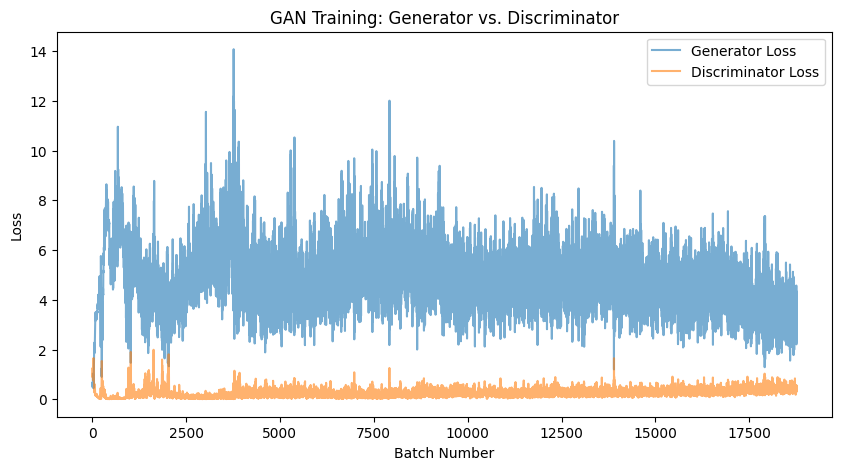

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss", alpha=0.6)
plt.plot(d_losses, label="Discriminator Loss", alpha=0.6)

plt.title("GAN Training: Generator vs. Discriminator")
plt.xlabel("Batch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()

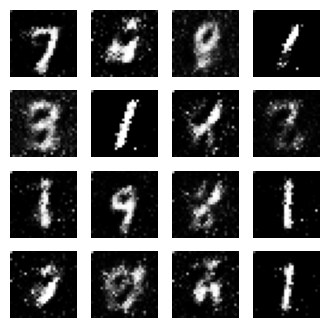

In [11]:
import numpy as np

# Generating fake images
z = torch.randn(16, 100)      #produce 16 images, 16 rows of 100 random numbers (noise)
fake_images = generator(z).view(-1, 28, 28).detach()

# Plot them in a 4x4 grid
plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i+1)       # 4x4 grid of numbers and move to next slot
    plt.imshow(fake_images[i], cmap='gray')
    plt.axis('off')
plt.show()